# Week 3

### 01 Assignment

[The assignment can be found here.](https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/03-Exercise.ipynb)

### 02 Status

I completed all the exercises. 

### 03 Solutions
#### Exercise 1
The solution to 1 - 6 is in modules/week03_ex1.py

In [36]:
%matplotlib inline
%matplotlib notebook
import modules.week03_ex1 as ex1

In [66]:
# 7
import random 
import csv

def generate_students(n):
    """A function that can generate n number of students with random:
    name, gender, courses (from a fixed list of course names), grades, img_url

    Parameters:
    n: Number of random student wanted
    """
    students = []
    f_names = ['John', 'Jane', 'Jessica', 'Jack', 'Bob', 'Billy', 'Josephine', 'Anne', 'Susan', 'George', 'Rex']
    l_names = ['Doe', 'Smith', 'Jensen', 'Black', 'Johnson', 'Kurt']
    genders = ['female', 'male', 'other']
    grades = [-3, 0, 2, 4, 7, 10, 12]
    course_names = ['Math', 'English', 'History', 'PE', 'Programming', 'Security']
    classrooms = ['C-105', 'C-162', 'C-102', 'C-265']
    
    for i in range(n):
        no_courses = random.choice(range(5)) + 1
        courses = []
        for course_name in random.sample(course_names, no_courses):
            courses.append(ex1.Course(course_name, 
            random.choice(classrooms), random.choice(f_names), ((random.choice(range(5)) + 1) * 10), random.choice(grades)))
        image_url = 'picture' + str(i) + '.jpg'
        name = random.choice(f_names) + ' ' + random.choice(l_names)
        student = ex1.Student(name, random.choice(genders), ex1.DataSheet(courses), image_url)  
        students.append(student)
    return students

students = generate_students(10)
print(students)

[Student('Jessica Doe', 'female', Datasheet([Course('History', 'C-162', 'Jack', 50, 4), Course('PE', 'C-105', 'Jack', 10, 10), Course('Programming', 'C-102', 'George', 30, 4), Course('Math', 'C-102', 'Anne', 50, 2)]), 'picture0.jpg'), Student('Billy Smith', 'male', Datasheet([Course('Programming', 'C-102', 'Susan', 10, 10), Course('Security', 'C-105', 'Anne', 40, 2), Course('PE', 'C-102', 'Jack', 20, -3), Course('History', 'C-265', 'John', 10, 4)]), 'picture1.jpg'), Student('Anne Doe', 'other', Datasheet([Course('Security', 'C-105', 'Rex', 20, 12), Course('History', 'C-162', 'Jane', 20, 12)]), 'picture2.jpg'), Student('Jessica Smith', 'female', Datasheet([Course('English', 'C-162', 'Susan', 40, 10)]), 'picture3.jpg'), Student('Billy Black', 'other', Datasheet([Course('PE', 'C-102', 'Billy', 30, 7), Course('History', 'C-162', 'Susan', 40, 2), Course('English', 'C-162', 'Susan', 10, 4), Course('Math', 'C-162', 'Susan', 10, 4)]), 'picture4.jpg'), Student('Susan Smith', 'female', Datasheet

In [68]:
# 7.A
def write_students_to_csv(students, out='students.csv'):
    """Writes a list of students to a csv file with format:
    stud_name, course_name, teacher, ects, classroom, grade, img_url

    Parameters:
    students: List of students
    """
    with open(out, 'w') as csv_file:
        fieldnames = ['stud_name', 'course_name', 'teacher', 'gender', 'ects', 'classroom', 'grade', 'img_url']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for student in students:
            courses = student.data_sheet.courses
            for course in courses:
                writer.writerow({'stud_name': student.name, 'course_name': course.name, 'teacher': course.teacher, 'gender':
                student.gender, 'ects': course.ECTS, 'classroom': course.classroom, 'grade': course.grade,
                'img_url': student.image_url})

write_students_to_csv(students)

# 8
def read_students_from_csv(csv_file):
    students = []
    with open(csv_file, 'r') as file_object:
        reader = csv.DictReader(file_object)
        courses = []
        student_name = ''
        former_name = ''
        former_gender = ''
        former_image = ''
        for row in reader:
            student_name = row['stud_name']
            gender = row['gender']
            image = row['img_url']
            if student_name == former_name or former_name == '':
                courses.append(ex1.Course(row['course_name'], row['classroom'], row['teacher'], row['ects'], row['grade']))
            else:
                data_sheet = ex1.DataSheet(courses)
                students.append(ex1.Student(former_name, former_gender, data_sheet, former_image))
                courses = []
                courses.append(ex1.Course(row['course_name'], row['classroom'], row['teacher'], row['ects'], row['grade']))
            former_name = student_name
            former_gender = gender
            former_image = image
    return students

read_students_from_csv('students.csv')
# Last student missing??

[Student('Jessica Doe', 'female', Datasheet([Course('History', 'C-162', 'Jack', '50', '4'), Course('PE', 'C-105', 'Jack', '10', '10'), Course('Programming', 'C-102', 'George', '30', '4'), Course('Math', 'C-102', 'Anne', '50', '2')]), 'picture0.jpg'),
 Student('Billy Smith', 'male', Datasheet([Course('Programming', 'C-102', 'Susan', '10', '10'), Course('Security', 'C-105', 'Anne', '40', '2'), Course('PE', 'C-102', 'Jack', '20', '-3'), Course('History', 'C-265', 'John', '10', '4')]), 'picture1.jpg'),
 Student('Anne Doe', 'other', Datasheet([Course('Security', 'C-105', 'Rex', '20', '12'), Course('History', 'C-162', 'Jane', '20', '12')]), 'picture2.jpg'),
 Student('Jessica Smith', 'female', Datasheet([Course('English', 'C-162', 'Susan', '40', '10')]), 'picture3.jpg'),
 Student('Billy Black', 'other', Datasheet([Course('PE', 'C-102', 'Billy', '30', '7'), Course('History', 'C-162', 'Susan', '40', '2'), Course('English', 'C-162', 'Susan', '10', '4'), Course('Math', 'C-162', 'Susan', '10', '4'

In [69]:
# 8.A
def print_student(students):
    for student in students:
        print('Name of student: %s. Image URL: %s. Average grade: %s' % (student.name, student.image_url, 
                                                                         student.get_avg_grade()))

print_student(students)

Name of student: Jessica Doe. Image URL: picture0.jpg. Average grade: 5.0
Name of student: Billy Smith. Image URL: picture1.jpg. Average grade: 3.25
Name of student: Anne Doe. Image URL: picture2.jpg. Average grade: 12.0
Name of student: Jessica Smith. Image URL: picture3.jpg. Average grade: 10.0
Name of student: Billy Black. Image URL: picture4.jpg. Average grade: 4.25
Name of student: Susan Smith. Image URL: picture5.jpg. Average grade: 1.33
Name of student: Billy Jensen. Image URL: picture6.jpg. Average grade: 3.0
Name of student: John Doe. Image URL: picture7.jpg. Average grade: 3.0
Name of student: Josephine Doe. Image URL: picture8.jpg. Average grade: 7.0
Name of student: Josephine Smith. Image URL: picture9.jpg. Average grade: -0.67


In [70]:
# 8.B
def sort_by_avg_grade(students):
    for student in sorted(students, key=ex1.Student.get_avg_grade, reverse=True):
        print('Name of student: %s. Average grade: %s' % (student.name, student.get_avg_grade()))

sort_by_avg_grade(students)

Name of student: Anne Doe. Average grade: 12.0
Name of student: Jessica Smith. Average grade: 10.0
Name of student: Josephine Doe. Average grade: 7.0
Name of student: Jessica Doe. Average grade: 5.0
Name of student: Billy Black. Average grade: 4.25
Name of student: Billy Smith. Average grade: 3.25
Name of student: Billy Jensen. Average grade: 3.0
Name of student: John Doe. Average grade: 3.0
Name of student: Susan Smith. Average grade: 1.33
Name of student: Josephine Smith. Average grade: -0.67


<IPython.core.display.Javascript object>


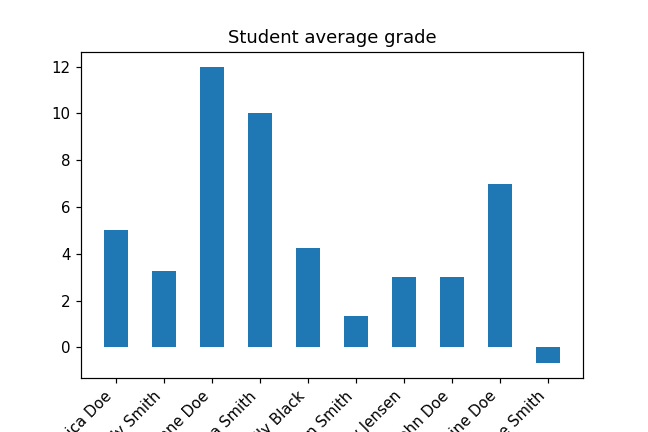

In [71]:
# 8.C
import matplotlib.pyplot as plt

def show_avg_grade_bar_chart(students):
    student_names = [student.name for student in students]
    avg_grades = [student.get_avg_grade() for student in students]
    plt.bar(student_names, avg_grades, width=0.5, align='center')
    plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
    plt.title('Student average grade')
    plt.show()

show_avg_grade_bar_chart(students) 

In [72]:
# 9
for student in students:
    print(student.name + ' has completed ' + str(student.get_study_progression()) + ' %')

Jessica Doe has completed 93.33333333333333 %
Billy Smith has completed 53.333333333333336 %
Anne Doe has completed 26.666666666666668 %
Jessica Smith has completed 26.666666666666668 %
Billy Black has completed 60.0 %
Susan Smith has completed 73.33333333333333 %
Billy Jensen has completed 26.666666666666668 %
John Doe has completed 33.33333333333333 %
Josephine Doe has completed 60.0 %
Josephine Smith has completed 60.0 %


<IPython.core.display.Javascript object>


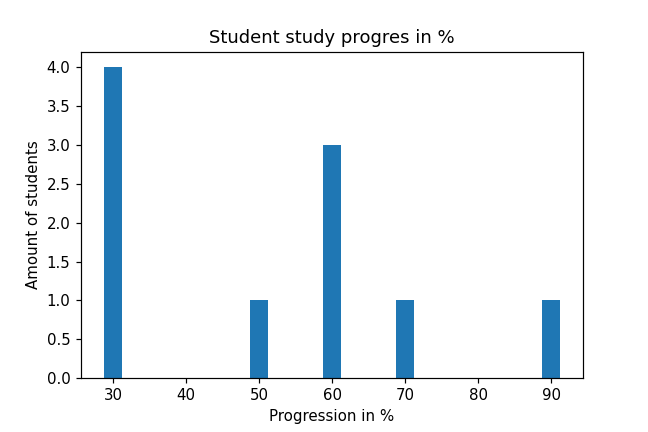

In [73]:
# 10
import matplotlib.pyplot as plt

def get_dict_of_study_prog(students):
    progression = {}
    category_steps = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
    for student in students:
        rounded_study_prog = round(student.get_study_progression() / 10) * 10
        for category in category_steps:
            if rounded_study_prog == category:
                progression.setdefault(category, 0)
                progression[category] += 1
    return progression

def show_study_progression_bar_chart(progression):
    plt.bar(progression.keys(), progression.values(), width = 2.5)
    plt.xticks()
    plt.xlabel('Progression in %')
    plt.ylabel('Amount of students')
    plt.title('Student study progres in %')
    plt.show()

show_study_progression_bar_chart(get_dict_of_study_prog(students))

#### Exercise 2

In [74]:
# 1 - 2
class NotEnoughStudentsException(Exception):
    pass

def three_closest_to_completion(students):
    """Gets the 3 students from a list who are closest to completing their studies
    
    Parameters:
    students: Student list
    """
    try:
        if len(students) < 3:
            raise NotEnoughStudentsException()
        else:
            top3 = sorted(students, key=ex1.Student.get_study_progression, reverse=True)
            return [top3[0], top3[1], top3[2]]
    except NotEnoughStudentsException:
        return 'There needs to be at least 3 students in the list'

print(three_closest_to_completion(students))
print(three_closest_to_completion([]))

[Student('Jessica Doe', 'female', Datasheet([Course('History', 'C-162', 'Jack', 50, 4), Course('PE', 'C-105', 'Jack', 10, 10), Course('Programming', 'C-102', 'George', 30, 4), Course('Math', 'C-102', 'Anne', 50, 2)]), 'picture0.jpg'), Student('Susan Smith', 'female', Datasheet([Course('PE', 'C-162', 'John', 40, -3), Course('History', 'C-265', 'Josephine', 20, -3), Course('Programming', 'C-265', 'George', 50, 10)]), 'picture5.jpg'), Student('Billy Black', 'other', Datasheet([Course('PE', 'C-102', 'Billy', 30, 7), Course('History', 'C-162', 'Susan', 40, 2), Course('English', 'C-162', 'Susan', 10, 4), Course('Math', 'C-162', 'Susan', 10, 4)]), 'picture4.jpg')]
There needs to be at least 3 students in the list


In [75]:
# 3 - 3.A
import csv

def write_to_file(students, out='top3.csv'):
    """Writes each student in a list to a .csv file

    Parameters:
    students: Student list
    out: Name of output .csv file. Default is top3.csv
    """
    with open(out, 'w') as file_object:
        try:
            if len(students) < 3:
                raise NotEnoughStudentsException()
            else: 
                for student in students:
                    file_object.write('%s\n' % student)
        except NotEnoughStudentsException:
            file_object.write('There needs to be at least 3 students in the list')

top3 = three_closest_to_completion(students)
write_to_file(top3)
write_to_file([])

#### Exercise 3

<IPython.core.display.Javascript object>


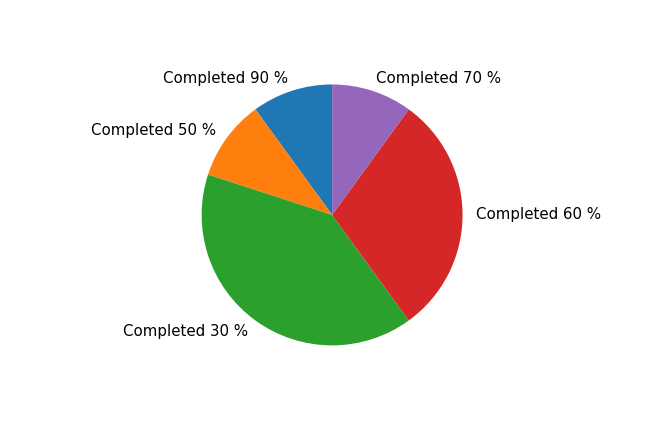

In [76]:
# 1
import matplotlib.pyplot as plt

def show_study_progression_pie_chart(progression):
    prog_labels = ['Completed ' + str(key) + ' %' for key in progression.keys()]
    plt.pie(progression.values(), labels = prog_labels, startangle = 90)
    plt.show()

show_study_progression_pie_chart(get_dict_of_study_prog(students))

<IPython.core.display.Javascript object>


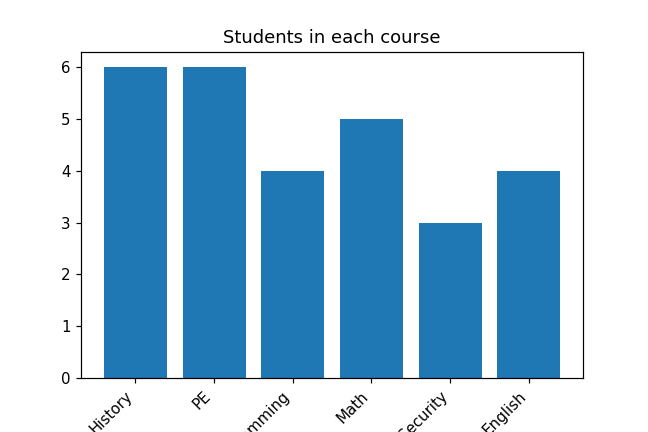

In [77]:
# 2
import matplotlib.pyplot as plt

def get_dict_students_in_course(students):
    students_in_course = {}
    for student in students:
        courses = student.get_courses()
        for course in courses:
            students_in_course.setdefault(course.name, 0)
            students_in_course[course.name] += 1
    return students_in_course

def show_bar_chart(data):
    plt.bar(data.keys(), data.values())
    plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
    plt.title('Students in each course')
    plt.show()

show_bar_chart(get_dict_students_in_course(students))

<IPython.core.display.Javascript object>


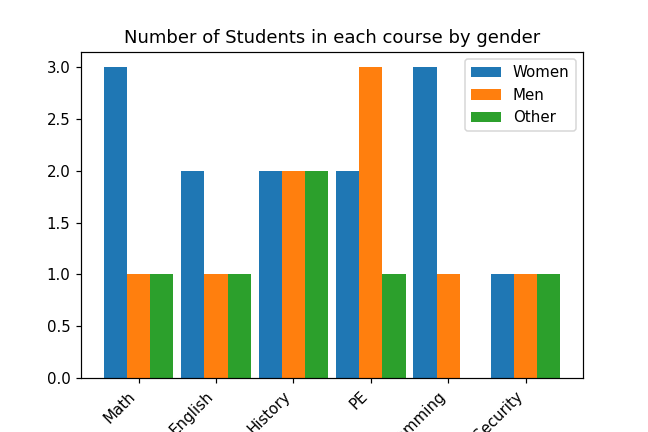

In [78]:
# 3
import matplotlib.pyplot as plt
import numpy as np

def get_gendered_students(gender, students):
    return [student for student in students if student.gender == gender]

def show_gendered_bar_chart(male_dict, female_dict, other_dict): 
    course_names = ['Math', 'English', 'History', 'PE', 'Programming', 'Security']
    all_courses = {course: 0 for course in course_names}
    male_all_courses = all_courses.copy()
    male_all_courses.update(male_dict)
    female_all_courses = all_courses.copy()
    female_all_courses.update(female_dict)
    other_all_courses = all_courses.copy()
    other_all_courses.update(other_dict)
    
    X_axis = np.arange(len(all_courses))
  
    plt.bar(X_axis - 0.3, female_all_courses.values(), 0.3, label = 'Women')
    plt.bar(X_axis, male_all_courses.values(), 0.3, label = 'Men')
    plt.bar(X_axis + 0.3, other_all_courses.values(), 0.3, label = 'Other')
    plt.xticks(X_axis, all_courses, rotation=45, horizontalalignment='right',fontweight='light')
    plt.title("Number of Students in each course by gender")
    plt.legend()
    plt.show()

male_students = get_gendered_students('male', students)
female_students = get_gendered_students('female', students)
other_students = get_gendered_students('other', students)

male_courses = get_dict_students_in_course(male_students)
female_courses = get_dict_students_in_course(female_students)
other_courses = get_dict_students_in_course(other_students)

show_gendered_bar_chart(male_courses, female_courses, other_courses)